In [60]:
import numpy as np
import scipy.integrate
import copy
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate

In [61]:
dataout = pd.read_csv(r"C:\Users\chloe\Documents\Chem Eng year 4\Research Project\Literature Review\Coding\dynamic_out.csv")

In [62]:
influent_state = pd.read_csv(r"C:\Users\chloe\Documents\Chem Eng year 4\Research Project\Literature Review\Coding\digester_influent.csv")

In [63]:
gasflowdataset = pd.read_csv(r"C:\Users\chloe\Documents\Chem Eng year 4\Research Project\Literature Review\Coding\dynamic_out_gasflow.csv")

In [64]:
#preprocessing 
#Calculating heating energy 

t_ad = 308.15
t_adi = 288.0081
Q_ad = influent_state ['Q']

def Heatingenergy(x):
    return ((1000*4.186)/(86400))*(308.15-288.0081)*x

influent_state['HE'] = influent_state['Q'].apply(Heatingenergy)

influent_state.to_csv('influentdatawithheatingenergy.csv', index=False)  

Influent_state_HE = pd.read_csv(r"C:\Users\chloe\Documents\Chem Eng year 4\Research Project\Literature Review\Coding\influentdatawithheatingenergy.csv")


In [65]:
#scalingfunction
#ScalingtheParamters
#HEating Energy

def Heatingenergy_scaled(x):
    return 100/ (1+np.exp((-0.3662041/25)*(275-x)))

Influent_state_HE['HE_scaled'] = Influent_state_HE['HE'].apply(Heatingenergy_scaled)

#MethaneConcentration

def scaling_function_methaneconc(x):
    return 100/ (1+np.exp((1647.918/25)*(1.64-x)))

dataout['MC_scaled'] = dataout['S_gas_ch4'].apply(scaling_function_methaneconc)

#BiogasProduction

def scaling_function_biogasprod(x):
    return 100/ (1+np.exp((0.06591674/25)*(1833.33-x)))

gasflowdataset['BGP_scaled'] = gasflowdataset['q_gas'].apply(scaling_function_biogasprod)

#pH 
def scaling_function_pH(x):
    return 100/ ((1+np.exp((97.3840386/25)*(5.64411664-x)))*(1+np.exp((-97.3840386/25)*(8.35588336-x))))

dataout['pH_scaled'] = dataout['pH'].apply(scaling_function_pH)

#H2S
def scaling_function_H2S(x):
    return 100/ (1+np.exp((-18.3102048/25)*(3.5-x)))

dataout['H2S_scaled'] = dataout['H2S'].apply(scaling_function_H2S)




In [66]:
#Weighting Functions 

#Heating Energy
def Heatingenergy_weighted(x):
    return 1*x

Influent_state_HE['HE_weighted'] = Influent_state_HE['HE_scaled'].apply(Heatingenergy_weighted)

#MethaneConcentration

def weighting_function_methaneconc(x):
    return 1*x

dataout['MC_weighted'] = dataout['MC_scaled'].apply(weighting_function_methaneconc)

#BiogasProduction

def weighting_function_biogasprod(x):
    return 1*x

gasflowdataset['BGP_weighted'] = gasflowdataset['BGP_scaled'].apply(weighting_function_biogasprod)

#pH 
def weighting_function_pH(x):
    return 1*x

dataout['pH_weighted'] = dataout['pH_scaled'].apply(weighting_function_pH)

#H2S
def weighting_function_H2S(x):
    return 1*x

dataout['H2S_weighted'] = dataout['H2S_scaled'].apply(weighting_function_H2S)



In [67]:
Energy_Consumption = Influent_state_HE['HE_weighted']

Product_Yield = gasflowdataset['BGP_weighted'] 

Process_Stability = dataout['pH_weighted']

Water_Consumption = 0

Emissions = 0

Safety_Perfromance = dataout['H2S_weighted']

Product_Quality = dataout['MC_weighted']


In [71]:
Combined_Metrics = Energy_Consumption + Process_Stability + Water_Consumption + Emissions + Safety_Perfromance + Product_Quality + Product_Yield

In [72]:
Overall_Health_Score = Combined_Metrics/5


print(Overall_Health_Score)

0        68.862570
1        87.726453
2        87.846618
3        87.976812
4        88.107753
           ...    
26876    89.264458
26877    89.221526
26878    89.225572
26879    89.014973
26880    88.962759
Length: 26881, dtype: float64


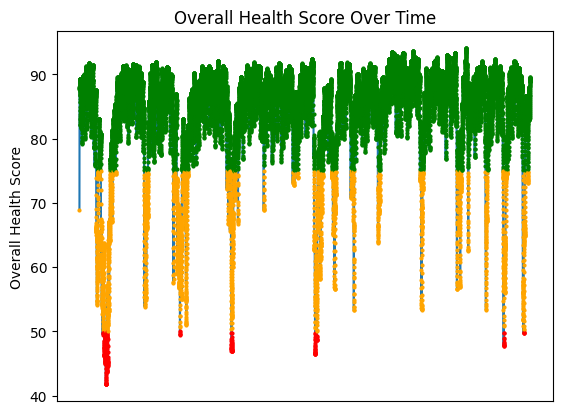

In [73]:
# Plot the line graph
plt.plot(Overall_Health_Score)

# Remove x-axis ticks and labels
plt.xticks([])

# Example thresholds for color coding
threshold_low = 50
threshold_high = 75

for i, score in enumerate(Overall_Health_Score):
    if score < threshold_low:
        plt.plot(i, score, marker='o', markersize=2, color='red')  # Color points below threshold_low in red
    elif score > threshold_high:
        plt.plot(i, score, marker='o', markersize=2, color='green')  # Color points above threshold_high in green
    elif score > threshold_low: 
         plt.plot(i, score, marker='o', markersize=2, color='orange')  # Color points below threshold_low in red
# Add labels and title
plt.ylabel('Overall Health Score')
plt.title('Overall Health Score Over Time')

# Show the plot
plt.show()